In [35]:
import numpy as np
import matplotlib.pyplot as plt


def cobb_douglas(A, k, alpha):
    return A*pow(k, alpha)

def solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt):
    k = np.zeros(Nt)
    i = np.zeros(Nt)
    A = np.zeros(Nt)
    y = np.zeros(Nt)
    t = np.zeros(Nt)
    dt = Tmax/Nt
    A[0] = A0
    k[0] = k0
    y[0] = cobb_douglas(A0, k0, alpha)
    i[0] = s*y[0]
    for ti in range(Nt-1):
        t[ti+1] = t[ti] + dt
        A[ti+1] = (1+g)*A[ti]
        k[ti+1] = i[ti] + (1 - n - delta)*k[ti]
        y[ti+1] = cobb_douglas(A[ti+1], k[ti+1], alpha)
        i[ti+1] = s*y[ti+1]
    return t, y, k, i, A 

def plot(t, y, ll):
    plt.figure(figsize=(5, 3))
    plt.plot(t, y, label=ll)
    plt.title('Solow-Swan Model')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def getSteadyState(s, delta, n, g, alpha, A):
    return pow(s*A/(n+delta), alpha/(1-alpha))

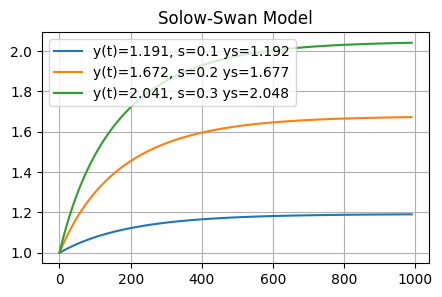

In [36]:
#TEST

# Parameters
Tmax = 1000#years
Nt = 100


k0 = 1
A0 = 1.0
s = 0.2  # savings rate
delta = 0.05  # depreciation rate
n = 0.02  # population growth rate
g = 0#0.02  # technological growth rate
alpha = 0.33  # output elasticity of capital

ss = [0.1, 0.2, 0.3]

plt.figure(figsize=(5, 3))
for s in ss:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, y, label='y(t)='+str(yy)+', s='+str(s)+' ys='+str(ys))
plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()

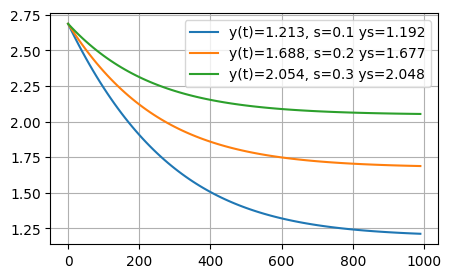

In [37]:
k0 = 20
A0 = 1.0
s = 0.2  # savings rate
delta = 0.05  # depreciation rate
n = 0.02  # population growth rate
g = 0#0.02  # technological growth rate
alpha = 0.33  # output elasticity of capital

plt.figure(figsize=(5, 3))
for s in ss:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, y, label='y(t)='+str(yy)+', s='+str(s)+' ys='+str(ys))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()

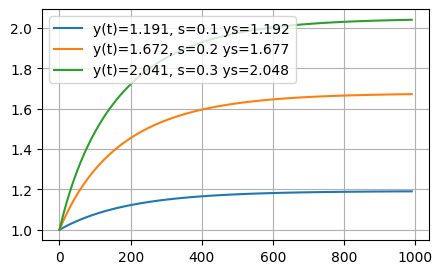

In [38]:
k0 = 1
A0 = 1.0
s = 0.2  # savings rate
delta = 0.05  # depreciation rate
n = 0.02  # population growth rate
g = 0#0.02  # technological growth rate
alpha = 0.33  # output elasticity of capital

plt.figure(figsize=(5, 3))
for s in ss:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, y, label='y(t)='+str(yy)+', s='+str(s)+' ys='+str(ys))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = np.array([.25, 1.25, 3.25])

ts_length = 20
xmin, xmax = 0, ts_length
ymin, ymax = 0, 3.5

In [40]:
def g(A, s, alpha, delta, k):
    return A * s * k**alpha + (1 - delta) * k
def simulate_ts(x0_values, ts_length):

    k_star = (s * A / delta)**(1.0/(1-alpha))
    fig, ax = plt.subplots(figsize=[11, 5])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    ts = np.zeros(ts_length)

    # simulate and plot time series
    for x_init in x0_values:
        ts[0] = x_init
        for t in range(1, ts_length):
            ts[t] = g(A, s, alpha, delta, ts[t-1])
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6, label=r'$k_0=%g$' %x_init)
    ax.plot(np.arange(ts_length), np.full(ts_length,k_star), alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'Time, t', fontsize=14)
    ax.set_ylabel(r'Capital, k', fontsize=14)
    plt.show()

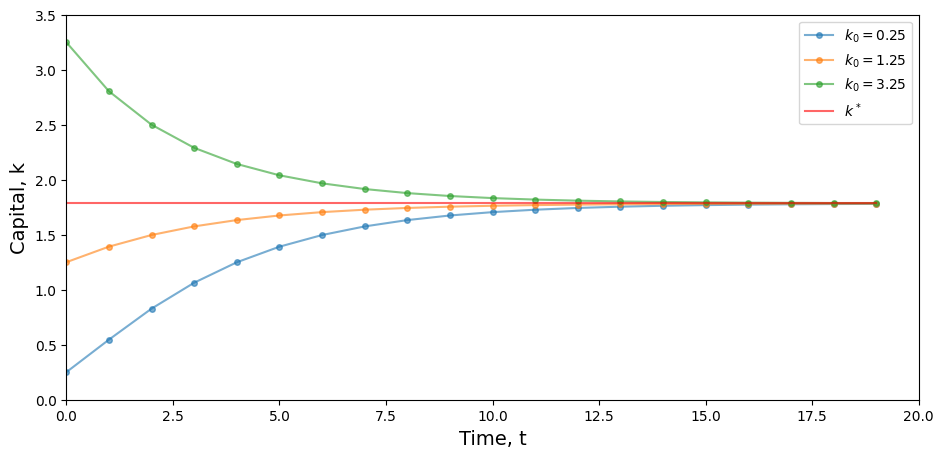

In [41]:
simulate_ts(x0, ts_length)

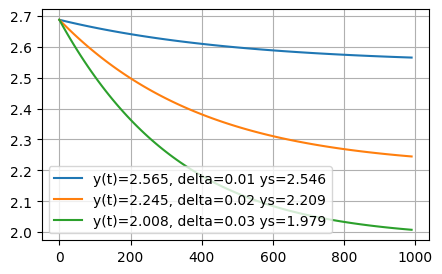

In [42]:
#Different depreciation rates on Y
k0 = 20
A0 = 1.0
s = 0.2  # savings rate
delta = 0.05  # depreciation rate
n = 0.02  # population growth rate
g = 0#0.02  # technological growth rate
alpha = 0.33  # output elasticity of capital

deltas = [0.01, 0.02, 0.03]

#output
plt.figure(figsize=(5, 3))
for delta in deltas:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, y, label='y(t)='+str(yy)+', delta='+str(delta)+' ys='+str(ys))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()


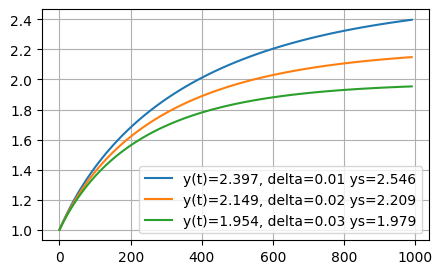

In [43]:
#Different depreciation rates on Y
k0 = 1
A0 = 1.0
s = 0.2  # savings rate
delta = 0.05  # depreciation rate
n = 0.02  # population growth rate
g = 0#0.02  # technological growth rate
alpha = 0.33  # output elasticity of capital

deltas = [0.01, 0.02, 0.03]

#output
plt.figure(figsize=(5, 3))
for delta in deltas:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, y, label='y(t)='+str(yy)+', delta='+str(delta)+' ys='+str(ys))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()

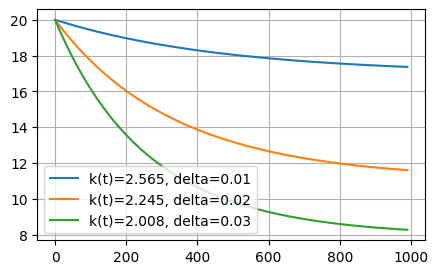

In [47]:
#Different deprecation rate on capital
k0=20

plt.figure(figsize=(5, 3))
for delta in deltas:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, k, label='k(t)='+str(yy)+', delta='+str(delta))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()

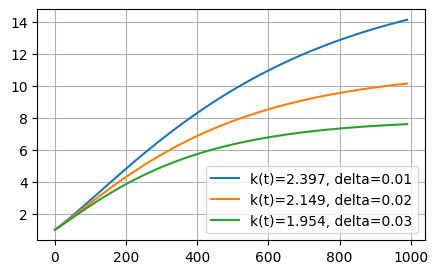

In [48]:
#capital
k0=1

plt.figure(figsize=(5, 3))
for delta in deltas:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, k, label='k(t)='+str(yy)+', delta='+str(delta))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()

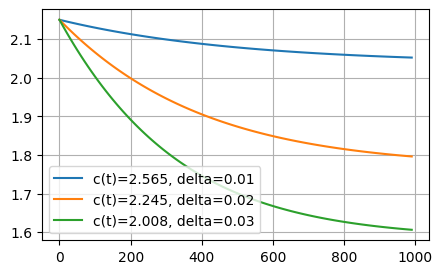

In [51]:
#consumption
k0=20 
plt.figure(figsize=(5, 3))
for delta in deltas:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    c = y - i
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, c, label='c(t)='+str(yy)+', delta='+str(delta))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()

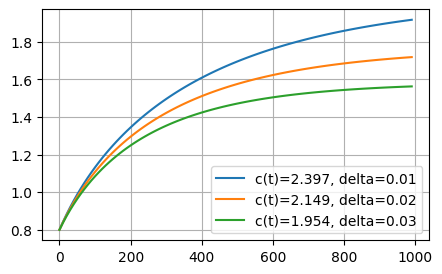

In [52]:
#consumption
k0=1
plt.figure(figsize=(5, 3))
for delta in deltas:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    c = y - i
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, c, label='c(t)='+str(yy)+', delta='+str(delta))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()

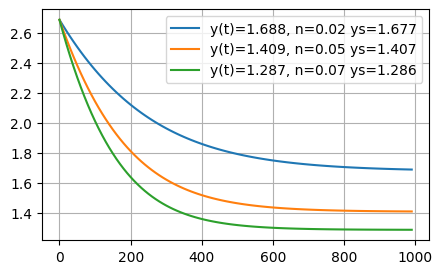

In [54]:
#Different population growth rate
k0 = 20
A0 = 1.0
s = 0.2  # savings rate
delta = 0.05  # depreciation rate
n = 0.02  # population growth rate
g = 0#0.02  # technological growth rate
alpha = 0.33  # output elasticity of capital

ns = [0.02, 0.05, 0.07]

plt.figure(figsize=(5, 3))
for n in ns:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, y, label='y(t)='+str(yy)+', n='+str(n)+' ys='+str(ys))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()

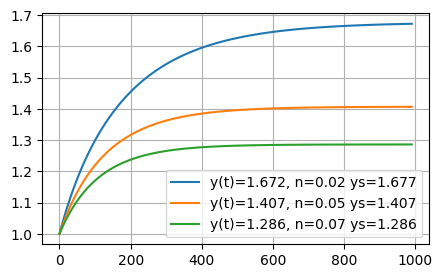

In [55]:
#Different population growth rate
k0 = 1
A0 = 1.0
s = 0.2  # savings rate
delta = 0.05  # depreciation rate
n = 0.02  # population growth rate
g = 0#0.02  # technological growth rate
alpha = 0.33  # output elasticity of capital

ns = [0.02, 0.05, 0.07]

plt.figure(figsize=(5, 3))
for n in ns:
    t, y, k, i, A  = solve(s, delta, n, g, alpha, k0, A0, Tmax, Nt)
    ys = round(getSteadyState(s, delta, n, g, alpha, A0), 3)
    yy = round(y[Nt-1], 3)
    plt.plot(t, y, label='y(t)='+str(yy)+', n='+str(n)+' ys='+str(ys))
#plt.title('Solow-Swan Model')
plt.legend()
plt.grid(True)
plt.show()